In [1]:
pwd

'/home/wsuser/work'

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7738f78128164301b8e7db3237e3b087 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8xnV9xFsWGq5kxLzFdZlQFj2xOhozscSST9Sm7615qE4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_2 = client_7738f78128164301b8e7db3237e3b087.get_object(Bucket='cricketposeestimation-donotdelete-pr-awuscrfywbvfee', Key='shot.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# Load the Dataset

In [7]:
ls -1

In [8]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
ls -1

shot/


# Image Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
pwd

'/home/wsuser/work'

In [14]:
ls

shot/


In [17]:
cd /home/wsuser/work/shot

/home/wsuser/work/shot


In [18]:
ls

testing/  training/


In [20]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/shot/training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 385 images belonging to 4 classes.


In [22]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/shot/testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 40 images belonging to 4 classes.


In [23]:
len(x_test)

2

In [18]:
326/24

13.583333333333334

In [24]:
x_train.class_indices

{'cut': 0, 'drive': 1, 'pull': 2, 'sweep': 3}

# CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [26]:
model=Sequential()

In [27]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=20,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/1979730393.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=20,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/20
17/17 [==============================] - 3s 146ms/step - loss: 0.7315 - accuracy: 0.7221 - val_loss: 1.5348 - val_accuracy: 0.5000
Epoch 2/20
17/17 [==============================] - 2s 140ms/step - loss: 0.6703 - accuracy: 0.7429 - val_loss: 1.5377 - val_accuracy: 0.5000
Epoch 3/20
17/17 [==============================] - 2s 134ms/step - loss: 0.5762 - accuracy: 0.7948 - val_loss: 1.4377 - val_accuracy: 0.5500
Epoch 4/20
17/17 [==============================] - 2s 140ms/step - loss: 0.7079 - accuracy: 0.7143 - val_loss: 1.4633 - val_accuracy: 0.4000
Epoch 5/20
17/17 [==============================] - 3s 145ms/step - loss: 0.5505 - accuracy: 0.8260 - val_loss: 1.7515 - val_accuracy: 0.5000
Epoch 6/20
17/17 [==============================] - 2s 143ms/step - loss: 0.5311 - accuracy: 0.8052 - val_loss: 1.6526 - val_accuracy: 0.5000
Epoch 7/20
17/17 [==============================] - 2s 134ms/step - loss: 0.4127 - accuracy: 0.8442 - val_loss: 1.8656 - val_accuracy: 0.5000
Epoch 

In [34]:
model.save('pose.h5')

# Test Model

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('pose.h5')

In [38]:
img=image.load_img(r"/home/wsuser/work/shot/testing/sweep/6.jpg",target_size=(64,64))

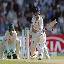

In [39]:
img

In [40]:
x=image.img_to_array(img)

In [41]:
x

array([[[ 58.,  57.,  53.],
        [ 62.,  62.,  60.],
        [ 35.,  39.,  40.],
        ...,
        [ 24.,  25.,  30.],
        [ 35.,  29.,  29.],
        [ 26.,  27.,  31.]],

       [[ 39.,  34.,  31.],
        [ 35.,  31.,  30.],
        [ 24.,  22.,  25.],
        ...,
        [ 42.,  40.,  45.],
        [ 60.,  50.,  49.],
        [ 41.,  37.,  38.]],

       [[ 51.,  41.,  40.],
        [ 46.,  37.,  38.],
        [ 31.,  25.,  29.],
        ...,
        [ 47.,  42.,  48.],
        [ 68.,  56.,  56.],
        [ 62.,  53.,  54.]],

       ...,

       [[165., 162., 107.],
        [164., 160.,  99.],
        [164., 160.,  97.],
        ...,
        [205., 192., 173.],
        [204., 191., 172.],
        [198., 186., 164.]],

       [[162., 163.,  95.],
        [161., 162.,  94.],
        [165., 166.,  98.],
        ...,
        [199., 185., 156.],
        [199., 185., 158.],
        [204., 189., 160.]],

       [[161., 162.,  94.],
        [159., 160.,  92.],
        [162., 1

In [42]:
x.ndim

3

In [43]:
x=np.expand_dims(x,axis=0)

In [44]:
x

array([[[[ 58.,  57.,  53.],
         [ 62.,  62.,  60.],
         [ 35.,  39.,  40.],
         ...,
         [ 24.,  25.,  30.],
         [ 35.,  29.,  29.],
         [ 26.,  27.,  31.]],

        [[ 39.,  34.,  31.],
         [ 35.,  31.,  30.],
         [ 24.,  22.,  25.],
         ...,
         [ 42.,  40.,  45.],
         [ 60.,  50.,  49.],
         [ 41.,  37.,  38.]],

        [[ 51.,  41.,  40.],
         [ 46.,  37.,  38.],
         [ 31.,  25.,  29.],
         ...,
         [ 47.,  42.,  48.],
         [ 68.,  56.,  56.],
         [ 62.,  53.,  54.]],

        ...,

        [[165., 162., 107.],
         [164., 160.,  99.],
         [164., 160.,  97.],
         ...,
         [205., 192., 173.],
         [204., 191., 172.],
         [198., 186., 164.]],

        [[162., 163.,  95.],
         [161., 162.,  94.],
         [165., 166.,  98.],
         ...,
         [199., 185., 156.],
         [199., 185., 158.],
         [204., 189., 160.]],

        [[161., 162.,  94.],
       

In [45]:
x.ndim

4

In [46]:
pred=np.argmax(model.predict(x),axis=1)

In [47]:
pred

array([3])

In [48]:
index=['cut', 'drive', 'pull', 'sweep']

In [49]:
index[pred[0]]

'sweep'

In [77]:
img=image.load_img(r"/home/wsuser/work/shot/testing/sweep/0.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['cut', 'drive', 'pull', 'sweep']
print(index[pred[0]])

sweep


In [76]:
img=image.load_img(r"/home/wsuser/work/shot/testing/pull/4.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['cut', 'drive', 'pull', 'sweep']
print(index[pred[0]])

pull


In [78]:
img=image.load_img(r"/home/wsuser/work/shot/testing/drive/1.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['cut', 'drive', 'pull', 'sweep']
print(index[pred[0]])

drive


In [87]:
img=image.load_img(r"/home/wsuser/work/shot/testing/cut/9.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['cut', 'drive', 'pull', 'sweep']
print(index[pred[0]])

cut


# IBM Deployment

In [46]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 21.5 MB/s eta 0:00:01


In [88]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"2QAJHYLFbLdBlsXDQHw1yqhYC5RCWUXwFMbqup2ocVZQ"
}

In [89]:
client=APIClient(wml_credentials)

In [90]:
client

In [91]:
def guid_space_name(client,pose_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==pose_deploy)['metadata']['id'])

In [96]:
space_uid=guid_space_name(client,'pose_deploy')
print(space_uid)

d3d541eb-a1e9-4161-becc-7ae8ad33744d


In [97]:
client.set.default_space(space_uid)

'SUCCESS'

In [60]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [98]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [99]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [100]:
ls

pose.h5  testing/  training/


In [101]:
!tar -zcvf pose.tgz pose.h5

pose.h5


In [102]:
ls

pose.h5  pose.tgz  testing/  training/


In [103]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [104]:
model_details=client.repository.store_model(model='pose.tgz',
            meta_props={
                        client.repository.ModelMetaNames.NAME:"CNN Model",
                        client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
                        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
    
})

In [105]:
model_id=client.repository.get_model_id(model_details)

In [106]:
model_id

'f95d13a3-1b3c-471e-8a73-b6d1d9203a41'

In [107]:
ls

pose.h5  pose.tgz  testing/  training/


In [110]:
client.repository.download('f95d13a3-1b3c-471e-8a73-b6d1d9203a41','posecnn.tgz')

File with name: 'posecnn.tgz' already exists.


WMLClientError: File with name: 'posecnn.tgz' already exists.

In [111]:
ls

posecnn.tgz  pose.h5  pose.tgz  testing/  training/
